**UCD_PA Specialist Certificate in Data Analytics Essentials -  Machine Learning (ML) Assignment**
# 10-year risk of future coronary heart disease (CHD) Prediction  machine learning

## DataSet Description

DataSet Source: [framingham-heart-study-dataset](https://www.kaggle.com/datasets/aasheesh200/framingham-heart-study-dataset)

* Demographic Information
  * age: age of the participant in years
  * male: gender of the participant (1 = male, 0 = female)
  * education: Some high school (1), high school/GED (2), some college/vocational school (3), college (4)
  * currentSmoker: whether the participant is currently a smoker (1 = yes, 0 = no)
  * cigsPerDay: number of cigarettes smoked per day
* Medical Information
  * BPmeds: hether the participant is currently taking blood pressure medication (1 = yes, 0 = no)
  * prevalentStroke: whether or not the patient had previously had a stroke (1 = yes, 0 = no)
  * prevalentHyp: whether or not the patient was hypertensive (1 = yes, 0 = no)
  * diabetes:  whether the participant has a history of diabetes (1 = yes, 0 = no)
  * totChol: Total cholesterol (mg/dL)
  * sysBP: Systolic Blood Pressure (mmHg)
  * diaBP: Diastolic blood pressure (mmHg)
  * BMI: Body Mass Index, weight (kg)/height (m)^2
  * heartRate: Heart rate (beats/minute)
  * glucose: Blood glucose level (mg/dL)
*  Predicted Outcome
   *  TenYearCHD: the outcome variable indicating whether the participant developed CHD within 10 years (1 = yes, 0 = no)


## Import Libraries

In [2]:
# import libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# data visualisation
import seaborn as sns   #Seaborn for data visualisation
import matplotlib.pyplot as plt
#setting the standard color code ..styling
sns.set(color_codes=True) 
# sklearn libraries
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# imblearn libraries
from imblearn.over_sampling import RandomOverSampler


# import warnings
# warnings.simplefilter(action="ignore", category=FutureWarning)

## Custom Python Functions

In [3]:
## plot distributions of features in the supplied data set
def plot_feature_distributions(dataframe):
    """
    Plots the distribution of each feature in the dataset.

    Parameters: 
        dataframe: Pandas dataframe
    
    Returns: 
        Display hist plots for dataframe
    """
    dataframe.hist(figsize=(20,10))
    plt.show()


In [4]:
def get_model_results( df, target, sampler, scaler, model):
    """
    Build and evaluation model
    - prepare and split dataframe to X and y
    - split into training and test data , test size=0.3
    - resample training data
    - build and fit model
    - evaluate and output model scores
        - ROC Score
        - Classification Report
        - Confusion Matrix

    Parameters:
        df: dataframe
        target: label/ classifier columns name
        sampler:  Resampling method
        scaler: Scaling method
        model: ML algorithm (e.g. sklearn LogisticRegression)

    Returns:
        Prints model Scores

    """
    # Prep Data
    X, y = prep_data(df=df, target=target)

    # Split Data into training and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    #resample training data
    X_resampled, y_resampled = sampler.fit_resample(X_train,y_train)

    # create Pipeline
    pipeline = make_pipeline(scaler, model)

    # Fit your training model to your training set
    pipeline.fit(X_resampled, y_resampled)

    # Obtain the predicted values and probabilities from the model 
    predicted = pipeline.predict(X_test)
    
    try:
        probs = pipeline.predict_proba(X_test)
        print('ROC Score:')
        print(roc_auc_score(y_test, probs[:,1]))
    except AttributeError:
        pass

    # Print the ROC curve, classification report and confusion matrix
    print('\nClassification Report:')
    print(classification_report(y_test, predicted))
    print('\nConfusion Matrix:')
    print(confusion_matrix(y_test, predicted))

In [5]:
# Evaluate model
def evaluate_LR(y_test, y_pred):
    """ 
    Evaluate classification model
     - Calculate and print the classification report
     - Calculate and plot  Confusion Matrix

    Parameters:
        y_test: y_test data
        y_pred: predicted y data

    Returns:
        Prints classification report
        display confusrtion matrix chart
        cm:  confusion matrix
        scores:  accuracy, precision, f1

    """
  
    #print classification report)
    print(classification_report(y_test, y_pred))

    # Calculate the accuracy
    acc = accuracy_score(y_test, y_pred)
    
    # Calculate the precision
    precision = precision_score(y_test, y_pred)

    f1 = f1_score(y_test, y_pred)

    scores = (acc, precision, f1)

    # show confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(
        cm, annot=[
            [f"TP={cm[0][0]:.0f}",f"FP={cm[0][1]:.0f}"], 
            [f"FN={cm[1][0]:.0f}", f"TN={cm[1][1]:.0f}"]],
            fmt='', 
            cmap="Blues")
    plt.show()
    return cm, scores

## Import Dataset

In [44]:
# import  CSV file data into pandas dataframe 
df = pd.read_csv('DataSets/framingham.csv')
# rename column male to gender
df.rename(columns = {'male':'gender'}, inplace = True)
# Print Shape
print(df.shape)


(4238, 16)


## Exploratory Data Analysis

In [41]:
# show first 5 rows of dataframe
df.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [9]:
# Describe data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
male,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.000,1.0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
education,4133.0,1.978950,1.019791,1.00,1.00,2.0,3.000,4.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
BPMeds,4185.0,0.029630,0.169584,0.00,0.00,0.0,0.000,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0


In [10]:
# Describe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [12]:
# Total target == 1 rows in full dataset
all_target_1_count = df['TenYearCHD'].value_counts().values[1]
#  percentage of target column  == 1 vs whole data set
percent_TenYearCHD = round((all_target_1_count/df.shape[0])*100, 1)

print(f'dataset contains {percent_TenYearCHD}% observations where TenYearCHD target value == 1 ')


dataset contains 15.2% observations where TenYearCHD target value == 1 


In [13]:
# check for duplicates
df.duplicated().sum()

0

In [15]:
# Number of observations with Null Values
null_values = df.loc[df.isna().any(axis=1)]
count_null_rows = null_values.shape[0]

# null rows as percentage of dataset
percent_value = round( count_null_rows/df.shape[0]*100, 1)


# Total target == 1 (TenYearCHD) in null rows
null_target_1_count = null_values['TenYearCHD'].value_counts().values[1]

# target == 1 values as a percentage of all Target == 1 in data set
percent_target_null = round((null_target_1_count/all_target_1_count)*100, 1)

print(f'Null Value Rows: {count_null_rows}')
print(f'as % of dataset: {percent_value}')
print (f'Null rows contains {percent_target_null} % of observations where TenYearCHD target value == 1 ')

Null Value Rows: 582
as % of dataset: 13.7
Null rows contains 13.5 % of observations where TenYearCHD target value == 1 


In [16]:
# list columns with null values and counts
df.isna().sum().sort_values(ascending=False)

glucose            388
education          105
BPMeds              53
totChol             50
cigsPerDay          29
BMI                 19
heartRate            1
male                 0
age                  0
currentSmoker        0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
TenYearCHD           0
dtype: int64

In [ ]:
# list of categorical columns 
categorical_columns = ['gender', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke','prevalentHyp','diabetes', 'TenYearCHD']

#list of numerical columns (continuos)
numerical_columns = ['age', 'cigsPerDay', 'totChol','sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']



Notes: 

1. 4238 number of observations/rows in dataset
2. 15.2% target class ==1  unbalanced data  and potentially require resmapling in preprocessing stage
3. Data types (floats and integers only)
4. No duplicated rows
5. Null Values
   1. Number of rows with null values 582 which equates to 13.7% of observations
   2. Null rows account for 13.5% of all observations with risk of heart disease (TenYearCHD)
   3. dropping null values would lead  significant to loss of data
   4. replace null values in preprocessing with mean value ( for nominal columns replace with median)



### Visualise Data

Text(0.5, 1.0, 'TenYearCHD')

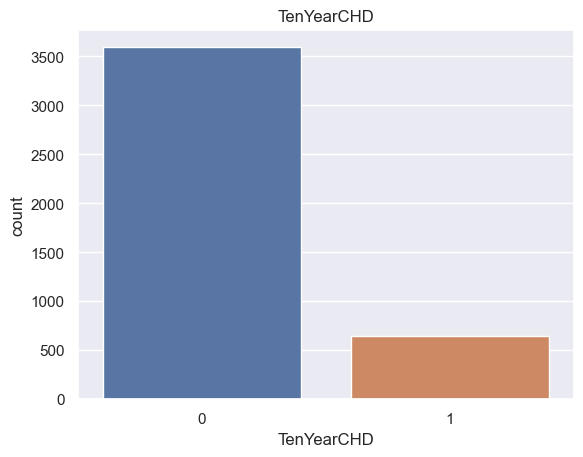

In [18]:
sns.countplot(x='TenYearCHD',data=df)
plt.title('TenYearCHD by prediction')


* TenYearCHD : The 10 year risk of coronary heart disease(CHD). 
  * 1 = Yes risk of CHD
  * 0 = No potential risk of CHD
* 15%  of the total observations are classed the Risk of CHD (4238 total observations), therefore, we have an imblanced dataser


Text(0.5, 1.0, 'TenYearCHD by prediction')

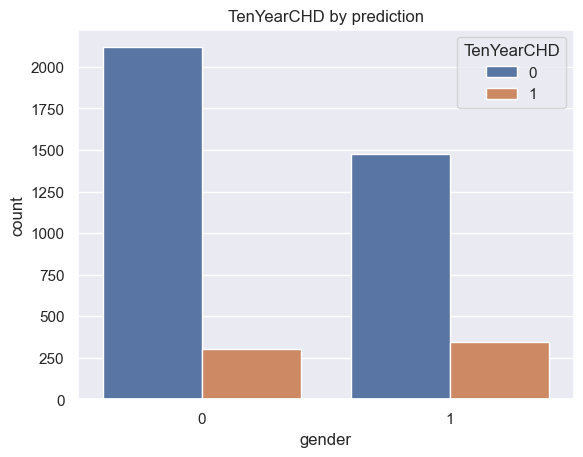

In [43]:
sns.countplot(x='gender',data=df, hue='TenYearCHD')
plt.title('TenYearCHD by prediction')

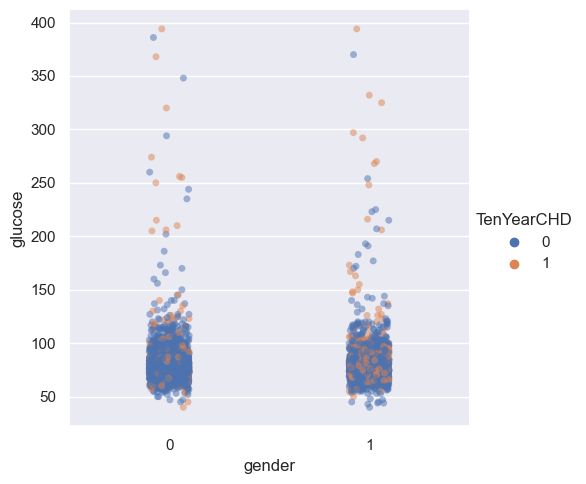

In [42]:
sns.catplot(
    x='gender',
    y='glucose',
    hue='TenYearCHD',
    alpha=0.5,
    data=df


)

In [19]:
def prep_data(df: pd.DataFrame) -> (np.ndarray, np.ndarray):
    """
    Convert the DataFrame into two variable
    X: Features columns
    y: Target
    """

    X = df.drop("TenYearCHD", axis=1).values
    y = df.TenYearCHD.values
  
    return X, y

In [23]:
# Define a function to create a scatter plot of our data and labels
def plot_data(X: np.ndarray, y: np.ndarray):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    # plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

<AxesSubplot:xlabel='sysBP', ylabel='diaBP'>

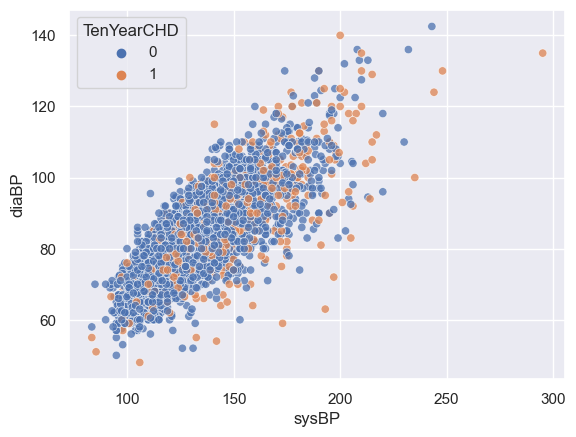

In [34]:
sns.scatterplot(
    x='sysBP',
    y='diaBP',
    hue='TenYearCHD',
    markers='o',
    alpha=0.75,
    data=df)

<AxesSubplot:xlabel='glucose', ylabel='diaBP'>

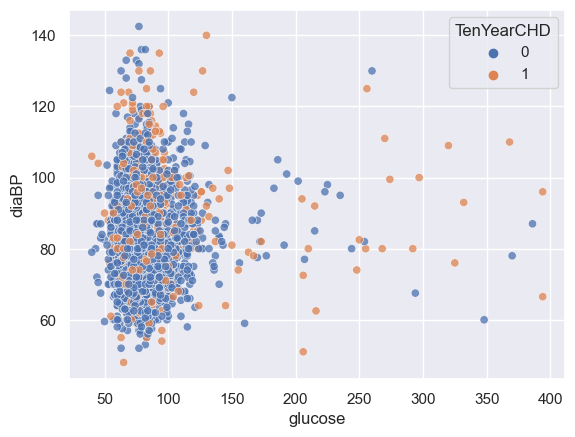

In [35]:
sns.scatterplot(
    x='glucose',
    y='diaBP',
    hue='TenYearCHD',
    markers='o',
    alpha=0.75,
    data=df)

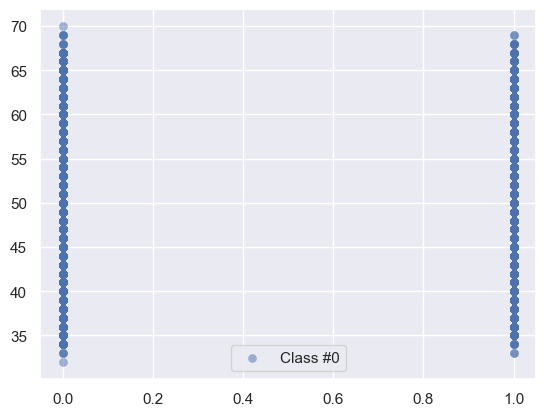

In [24]:
# Create X and y from the prep_data function 
X, y = prep_data(df)
# Plot our data by running our plot data function on X and y
plot_data(X, y)

## Pre-Processing

<AxesSubplot:xlabel='male', ylabel='count'>

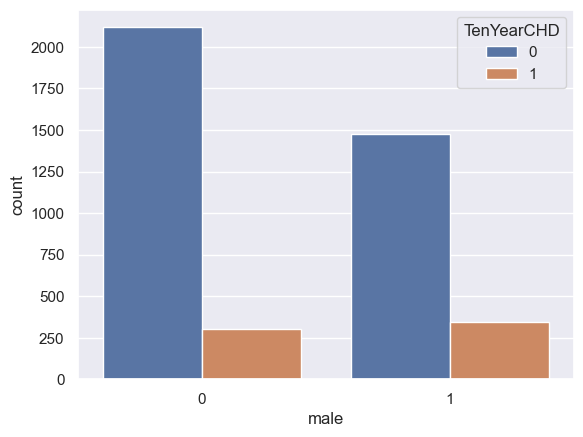

In [45]:

sns.countplot(x='male',data=df , hue='TenYearCHD')

In [1]:
df_corr = df.corr()
df_corr

NameError: name 'df' is not defined